In [18]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

class langevin:
    def __init__(self) -> None:
        self.dN = 1.0
        self.dt = 0.01
        self.dt2 = self.dt * 0.5
        self.dt4 = self.dt2 * 0.5
        self.kT = 1
        self.x = 0
        self.v = 1
        self.mass = 1.0
        self.k_spring = 1
        self.f = -self.k_spring * self.x
        self.Ek2 = 0.0

        self.temperature_coupling = 100
        self.c1 = np.exp(-0.5/self.temperature_coupling)
        self.c2 = np.sqrt((1 - self.c1**2) * self.kT)
        self.c2m = self.c2 * np.sqrt(1/self.mass)

    def langevin(self):
        self.v = self.c1*self.v + self.c2m*np.random.normal()
    
    def run(self, nsteps, sample_intervals):
        self.length = int(nsteps/sample_intervals)
        self.x_list = np.zeros(self.length, dtype=float)
        self.v_list = np.zeros(self.length, dtype=float)

        for step in tqdm(range(nsteps)):
            # half step
            self.langevin()
            self.v += self.dt2 * (self.f / self.mass)
            self.x += self.dt * self.v
            # another half step
            self.f = -self.k_spring * self.x
            self.v += self.dt2 * (self.f / self.mass)
            self.langevin()

            if step % sample_intervals == 0:
                nn = int(step/sample_intervals)
                self.x_list[nn] = self.x
                self.v_list[nn] = self.v

lan = langevin()
lan.run(2000000, 1)

100%|██████████| 2000000/2000000 [00:15<00:00, 128765.50it/s]


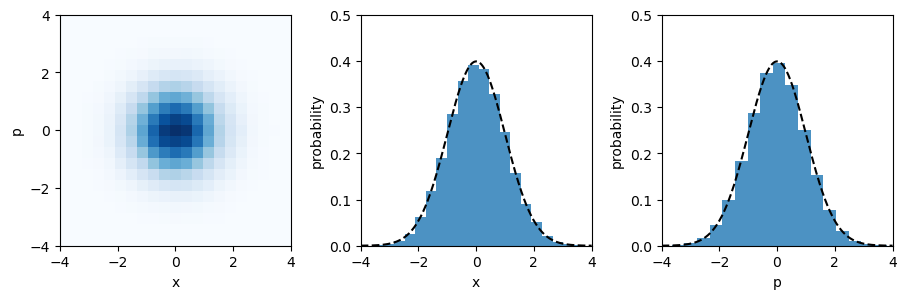

In [19]:
fig, axs = plt.subplots(1, 3)
axs[0].hist2d(lan.x_list, lan.v_list, bins=21, range=[[-4, 4], [-4, 4]],
              cmap="Blues")
axs[0].set_xlim(-4, 4)
axs[0].set_ylim(-4, 4)
axs[0].set_xlabel("x")
axs[0].set_ylabel("p")
axs[0].set_xticks([-4, -2, 0, 2, 4])
axs[0].set_yticks([-4, -2, 0, 2, 4])
axs[0].set_aspect(1)

position = np.linspace(-4, 4, 500)
boltz_factor = np.exp(-0.5/lan.kT*lan.k_spring*position**2)
Z = np.trapz(boltz_factor, position)
boltz_factor /= Z
axs[1].plot(position, boltz_factor, color="k", linestyle="--")
axs[2].plot(position, boltz_factor, color="k", linestyle="--")

axs[1].hist(lan.x_list, density=True, bins=21, alpha=0.8)
axs[1].set_xlim(-4, 4)
axs[1].set_ylim(0, 0.5)
axs[1].set_box_aspect(1)
axs[1].set_xlabel("x")
axs[1].set_ylabel("probability")
axs[1].set_xticks([-4, -2, 0, 2, 4])

axs[2].hist(lan.v_list, density=True, bins=21, alpha=0.8)
axs[2].set_xlim(-4, 4)
axs[2].set_ylim(0, 0.5) 
axs[2].set_box_aspect(1)
axs[2].set_xlabel("p")
axs[2].set_ylabel("probability")
axs[2].set_xticks([-4, -2, 0, 2, 4])

fig.set_size_inches(11, 3)
plt.savefig("md_lan_nh.pdf", bbox_inches="tight")
plt.show()